# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [18]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]
print(feature)
print(x)
print(feature.shape)
number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

[[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
[-2.78158782e+00 -5.79072687e+00 -8.85288476e+00 -3.67216533e+00
 -3.67021515e+00 -1.05144286e+01 -8.54949738e+00  1.94045737e+00
  3.65244555e+00  3.70321502e-01 -9.69420098e+00  1.09174399e+00
 -1.47444777e+00  5.58401926e-01 -1.53676402e+00 -5.24384657e+00
 -4.79551352e-02 -1.84469926e+00 -8.88915220e+00 -2.05182018e-01
  2.05214537e+00  1.38754229e+00  5.56187907e-01 -5.32835229e+00
 -7.04085968e+00 -7.53109751e+00 -2.35905817e+00 -1.43503287e+00
  2.83790103e+00 -7.64040174e+00 -4.80086411e+00  5.28748884e+00
  2.59318403e+00  4.07755207e+00 -8.13029171e+00 -2.81427776e+00
 -8.72919829e+00 -8.22060592e+00 -5.67996441e+00  5.25622742e+00
 -7.85932772e+00  4.83203435e+00  2.09417660e+00 -9.12573688e+00
  1.56948446e+00  3.83353428e+00  2.37574897e+00 -4.80705148e+00
  1.01336027e-01 -1.01205511e+01 -1.03166667e+01 -1.

## plot the input data

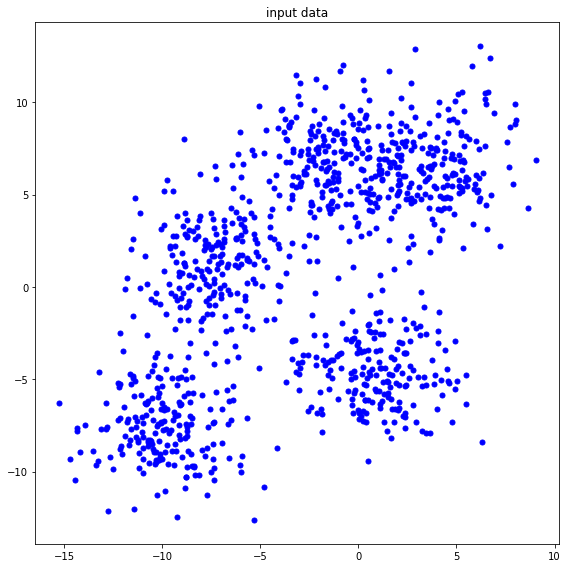

In [15]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y, color='blue', s=25, marker='o')

plt.axis('auto')
plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [27]:
f = np.array([[3,4],[1,2]])
c= np.array([5,6])
dis = (f-c) **2

print(dis)
print(np.sqrt(dis[: ,0] + dis[: ,1]))


[[ 4  4]
 [16 16]]
[2.82842712 5.65685425]


In [125]:
def compute_distance(feature, center):
    distance =(feature - center) ** 2
    distance = distance[:, 0] + distance[:, 1]
    #print(distance.shape)
    #distance = np.sqrt(distance[:, 0] + distance[:, 1])
    return distance 
#compute_distance(feature, [1,2])

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [261]:
def compute_centroid(feature, label_feature, value_label, before_centroid):
    centroid = before_centroid
    cluster_k = np.where(label_feature == value_label)
 
    cluster_k_feature = feature[cluster_k]
    #print(cluster_k_feature)

    print(len(cluster_k_feature))
    if len(cluster_k_feature) !=0:
        centroid = cluster_k_feature.sum(axis=0) / len(cluster_k_feature)
    return centroid
    
#compute_centroid(np.array([[1,2],[3,4], [4,5]]), np.array([1,2,2]), 2)

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [263]:
def compute_label(distance):
    index_label_feature = np.argmin(distance, axis=1)
    #print(index_label_feature)
    return index_label_feature
tempd = np.array([[10,2,3],[4,5,6]])
compute_label(tempd)


array([1, 0])

In [284]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 10
number_iteration    = 1000
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
label_cluster = np.arange(0,number_cluster,1)
print(label_cluster)
cluster_label_for_feature = np.zeros(number_data)
for i in range(number_data):
    cluster_label_for_feature[i] = np.random.randint(number_cluster)

print(cluster_label_for_feature)

# ===================================================

[0 1 2 3 4 5 6 7 8 9]
[1. 7. 8. 6. 7. 8. 6. 9. 8. 6. 8. 7. 0. 4. 7. 3. 2. 5. 3. 1. 9. 7. 9. 9.
 3. 2. 1. 2. 5. 1. 7. 4. 0. 8. 5. 5. 1. 5. 2. 1. 5. 2. 9. 1. 6. 8. 3. 7.
 4. 9. 7. 4. 9. 3. 9. 8. 9. 7. 1. 3. 3. 2. 5. 3. 4. 1. 8. 5. 2. 6. 5. 3.
 4. 1. 7. 3. 5. 2. 0. 2. 6. 0. 1. 6. 2. 4. 5. 7. 5. 4. 8. 4. 0. 6. 6. 2.
 7. 6. 1. 4. 3. 0. 6. 6. 4. 5. 6. 3. 7. 0. 4. 0. 2. 6. 7. 4. 4. 1. 7. 7.
 9. 1. 7. 9. 7. 3. 7. 7. 0. 2. 5. 6. 6. 5. 7. 4. 4. 9. 3. 8. 9. 7. 4. 9.
 8. 6. 4. 1. 4. 8. 3. 6. 5. 4. 8. 0. 5. 0. 2. 2. 8. 1. 2. 0. 0. 9. 0. 0.
 6. 6. 4. 9. 4. 1. 4. 1. 8. 7. 2. 3. 8. 4. 4. 1. 7. 5. 0. 3. 4. 4. 0. 4.
 2. 4. 9. 3. 1. 4. 2. 9. 4. 0. 9. 4. 1. 7. 6. 3. 9. 8. 8. 4. 6. 0. 6. 4.
 0. 7. 8. 6. 3. 0. 6. 5. 4. 0. 9. 2. 0. 8. 2. 0. 2. 3. 8. 2. 0. 0. 8. 8.
 1. 1. 5. 7. 9. 0. 8. 2. 8. 4. 6. 0. 0. 4. 4. 3. 4. 7. 6. 0. 5. 6. 6. 9.
 8. 9. 0. 5. 3. 3. 0. 5. 1. 4. 9. 2. 4. 0. 6. 5. 2. 7. 2. 1. 0. 0. 3. 8.
 9. 9. 1. 0. 1. 0. 9. 1. 9. 6. 6. 1. 1. 8. 8. 7. 6. 1. 9. 6. 3. 0. 5. 2.
 5. 9. 1. 5. 7. 2. 4. 6. 4. 3

In [234]:
teet = np.array([[1,2,3],[4,5,6]])
teet[:, 1] = 10
print(teet)

[[ 1 10  3]
 [ 4 10  6]]


In [285]:

for i in range(number_iteration):

    for k in range(number_cluster):
        centroid[k] = compute_centroid(feature, cluster_label_for_feature, k, centroid[k])
        #print(centroid[k])
        distance[:,k] = compute_distance(feature, centroid[k])

    cluster_label_for_feature = compute_label(distance)
    #print(distance)
    centroid_iteration[i] = centroid
print(cluster_label_for_feature)
print(centroid)


97
93
92
99
127
106
106
92
78
110
68
1
70
401
0
0
67
35
1
357
86
41
49
345
1
21
60
150
84
163
88
89
44
319
15
56
51
122
115
101
85
114
43
272
26
107
50
101
121
81
83
121
42
227
39
158
45
84
117
84
87
121
46
203
40
182
38
84
113
86
89
115
47
191
40
193
36
90
109
90
91
110
46
186
41
197
33
98
106
92
92
106
47
184
41
197
33
102
103
95
95
105
47
182
42
196
31
105
102
95
95
104
47
182
45
195
29
107
102
94
96
103
48
181
45
193
30
108
102
94
97
102
50
179
42
192
32
110
102
94
96
102
50
176
50
191
29
110
102
94
92
102
52
169
55
186
38
110
102
94
90
102
53
155
57
179
57
111
102
94
89
100
53
142
59
170
78
113
102
94
90
101
52
129
60
163
97
112
102
94
90
101
52
121
61
159
108
112
102
94
90
101
52
117
61
158
113
112
102
94
90
101
52
114
61
157
117
112
102
94
90
101
52
113
61
158
118
111
102
94
90
101
52
113
61
158
118
111
102
94
90
101
52
113
61
158
118
111
102
94
90
101
52
113
61
158
118
111
102
94
90
101
52
113
61
158
118
111
102
94
90
101
52
113
61
158
118
111
102
94
90
101
52
113
61
158
118
11

## plot the results

In [138]:
def plot_data(feature):
    fx = feature[:,0]
    fy = feature[:,1]
    plt.figure(figsize=(8,8))
    plt.title('input data')
    plt.scatter(fx, fy, color='blue', s=25, marker='o')

    plt.axis('auto')
    plt.tight_layout()
    plt.show()

In [94]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    #
    #
    # ===================================================
    plt.tight_layout()
    plt.show()

In [221]:
print(centroid_iteration[:, 1][0])

[-3.36291127  1.29943189]


In [226]:

def plot_centroid(centroid_iteration):
    # centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'

    }
    

    for i in range(centroid_iteration.shape[1]):
        label_ = r"${cluster=" + str(i) + "}$"
        plt.plot(centroid_iteration[:, i, 0], centroid_iteration[:, i, 1], '-', color=colordata[i], label=label_)
    plt.plot(centroid_iteration[0, : ,0], centroid_iteration[0, : , 1], 'o',color='blue',label='initial')    
    plt.plot(centroid_iteration[len(centroid_iteration)-1, : ,0], centroid_iteration[len(centroid_iteration)-1, : , 1], 's',color='red',label='final')   
    
    plt.tight_layout()
    plt.legend(loc='upper right')
    plt.show()

In [292]:
def plot_cluster(feature, label_feature, label_cluster):
    fx = feature[:,0]
    fy = feature[:,1]

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')

    colordata= {
    0: 'red', 1: 'blue', 2:'green', 3:'orange', 4:'purple', 5:'black', 6:'cyan', 7:'pink', 8: 'magenta', 9: 'yellow'
    }
    print(label_cluster)
    cmap = plt.cm.rainbow
    t = plt.scatter(fx,fy, c=label_feature,cmap=plt.cm.get_cmap('rainbow', len(label_cluster)))
    #for i in range(len(label_cluster)):
    #    clu_where = np.where(label_feature == i)
    #    t = plt.scatter(fx[clu_where], fy[clu_where], color=colordata[i] ,s=15)
    #    tlist.append(t)
    
    plt.colorbar(t, ticks=np.linspace(0,9,10))
    plt.tight_layout()


    plt.show()


[0 1 2 3 4 5 6 7 8 9]


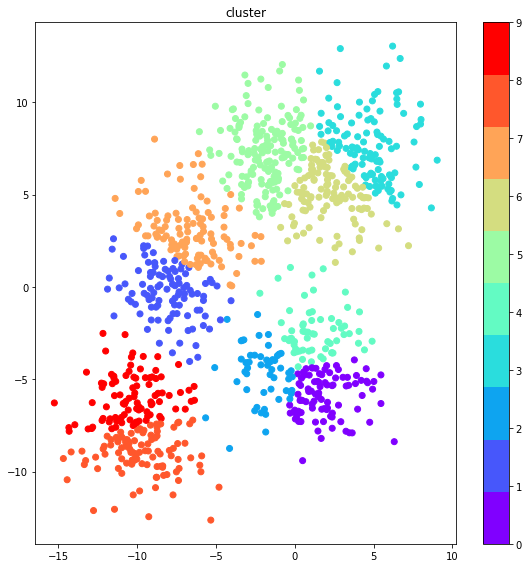

In [293]:
plot_cluster(feature, cluster_label_for_feature, label_cluster)

***

# results

***

1. plot the input data

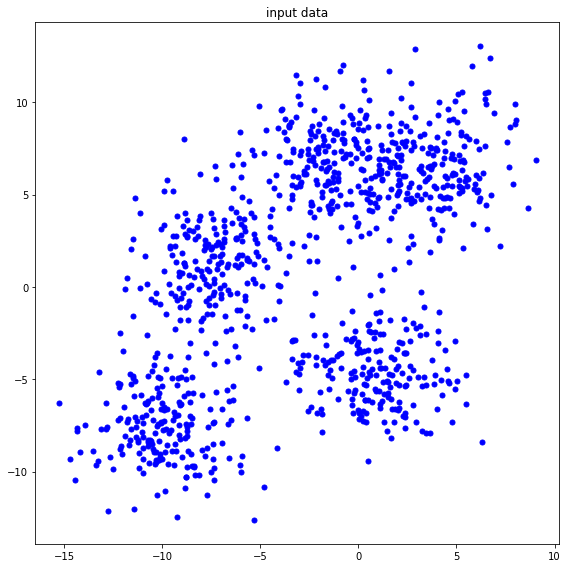

In [139]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

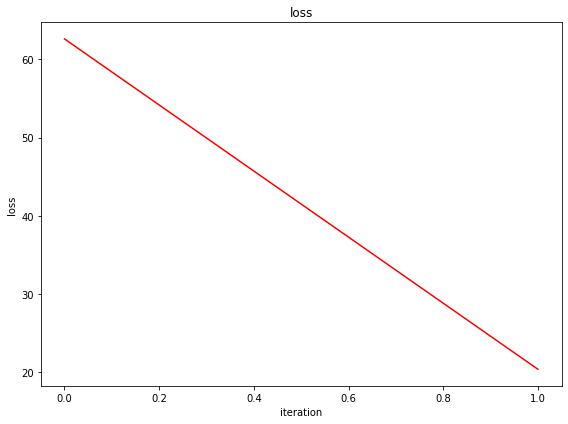

In [88]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

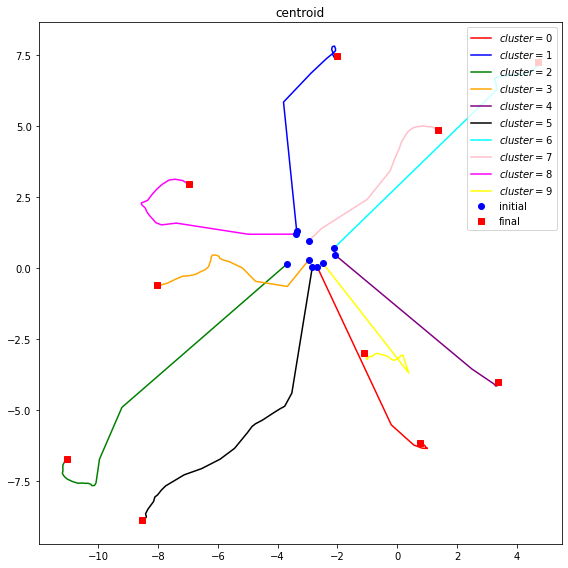

In [228]:
plot_centroid(centroid_iteration)

4. plot the final clustering result with the number of clusters being 5

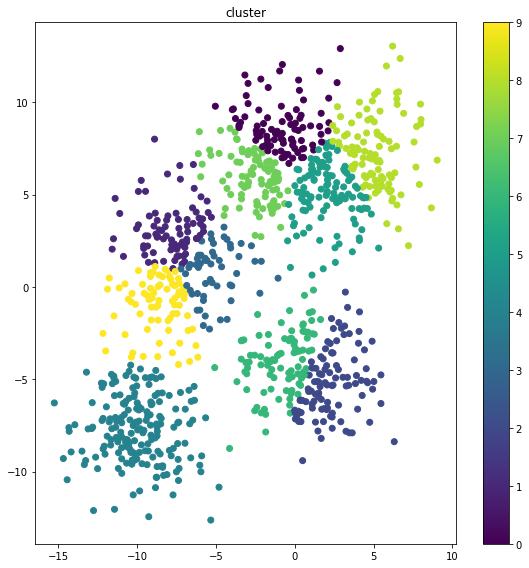

In [256]:
plot_cluster(feature, cluster_label_for_feature, label_cruster)

***

5. plot the loss over the iterations with the number of clusters being 10

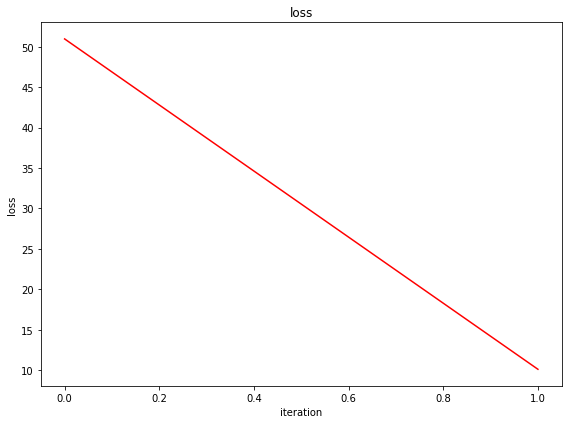

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

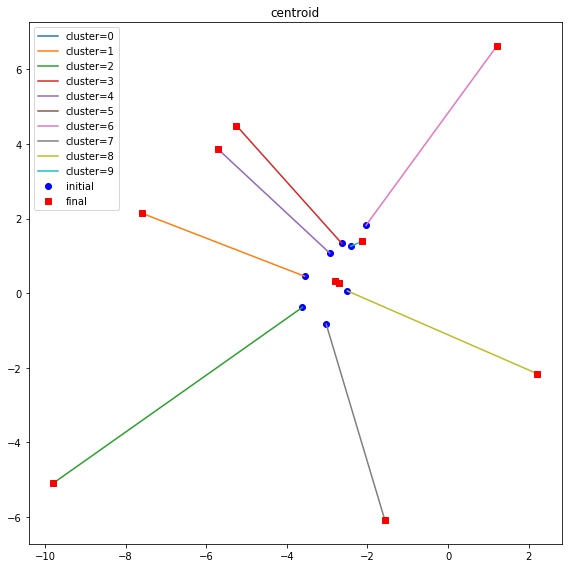

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

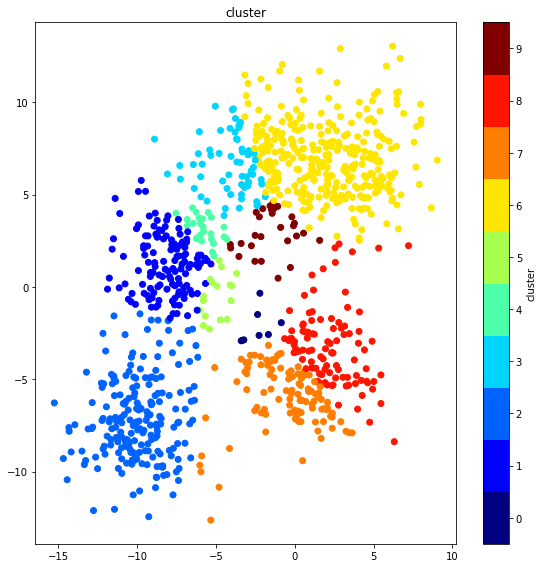

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***